# Problem Statement:

Develop a machine learning model that predicts the likelihood of a student being admitted to a university based on their academic and extracurricular profiles. The model aims to assist universities in making more informed and data-driven admission decisions by evaluating the chances of admission using various features such as GRE score, TOEFL score, university rating, statement of purpose strength, and others.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#libraries for visualizing decision tree
import pydotplus
from IPython.display import Image

# Data preparation

In [2]:
data=pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [3]:
data.shape

(400, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


Here research experience is categorical data type but wrongly mentioned as int

In [5]:
data['Research']=data['Research'].astype(object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    object 
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB


# Remove insignificant variable

In [7]:
data=data.drop('Serial No.',axis=1)

In [8]:
data.shape

(400, 8)

There is no use of serial num for further analysis 

# Distribution of variables

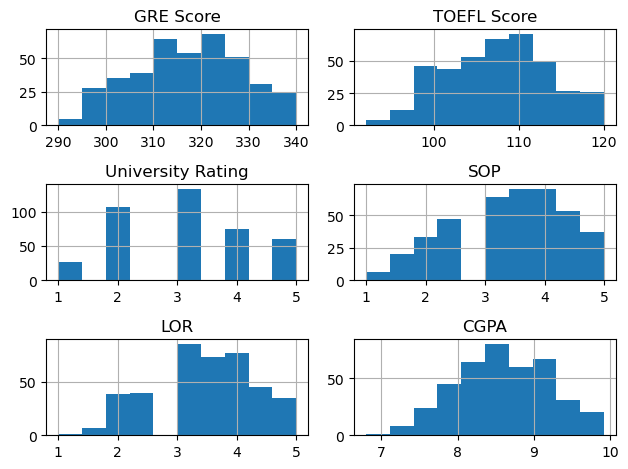

skewness:


GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

In [9]:
data.drop('Chance of Admit',axis=1).hist()
plt.tight_layout()
plt.show()
print('skewness:')
data.drop('Chance of Admit',axis=1).skew()

Above graph shows that variables are normally distributed

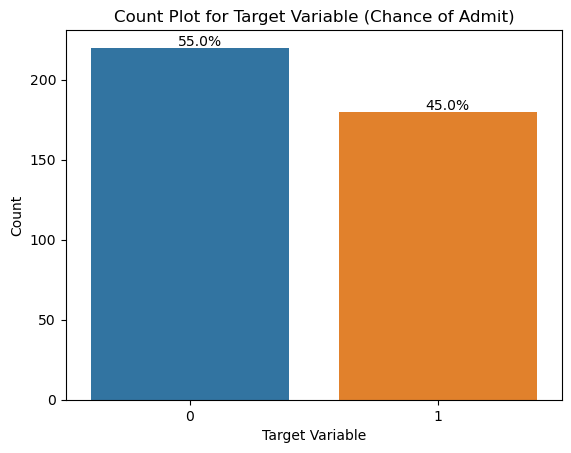

In [10]:
df=data['Chance of Admit'].copy()
df.value_counts()
sns.countplot(x=df)
plt.text(x = -0.05, y = df.value_counts()[0] + 1, s = str(round((df.value_counts()[0])*100/len(df),2)) + '%')
plt.text(x = 0.95, y = df.value_counts()[1] +1, s = str(round((df.value_counts()[1])*100/len(df),2)) + '%')
plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 12)
plt.xlabel('Target Variable', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

# Missing value treatment

In [11]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Encoding the categorical data

In [12]:
x=data.drop('Chance of Admit',axis=1)
y=data['Chance of Admit']

In [13]:
x_num=x.select_dtypes(include=[np.number])
x_cat=x.select_dtypes(include=[np.object])
x_num.head()

C:\Users\91886\AppData\Local\Temp\ipykernel_10680\2678190641.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_cat=x.select_dtypes(include=[np.object])


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [14]:
dummy=pd.get_dummies(data=x_cat,drop_first=True)
dummy.head()

C:\Users\91886\AppData\Local\Temp\ipykernel_10680\3305139940.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy=pd.get_dummies(data=x_cat,drop_first=True)


,Research_1
0,1
1,1
2,1
3,1
4,0


In [15]:
x_full=pd.concat([x_num,dummy],axis=1)
x_full.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


# Data spliting

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_full,y,random_state=10,test_size=0.2)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


# build model

In [18]:
model=DecisionTreeClassifier(criterion='entropy',random_state=10)

In [19]:
decisiontree=model.fit(x_train,y_train)

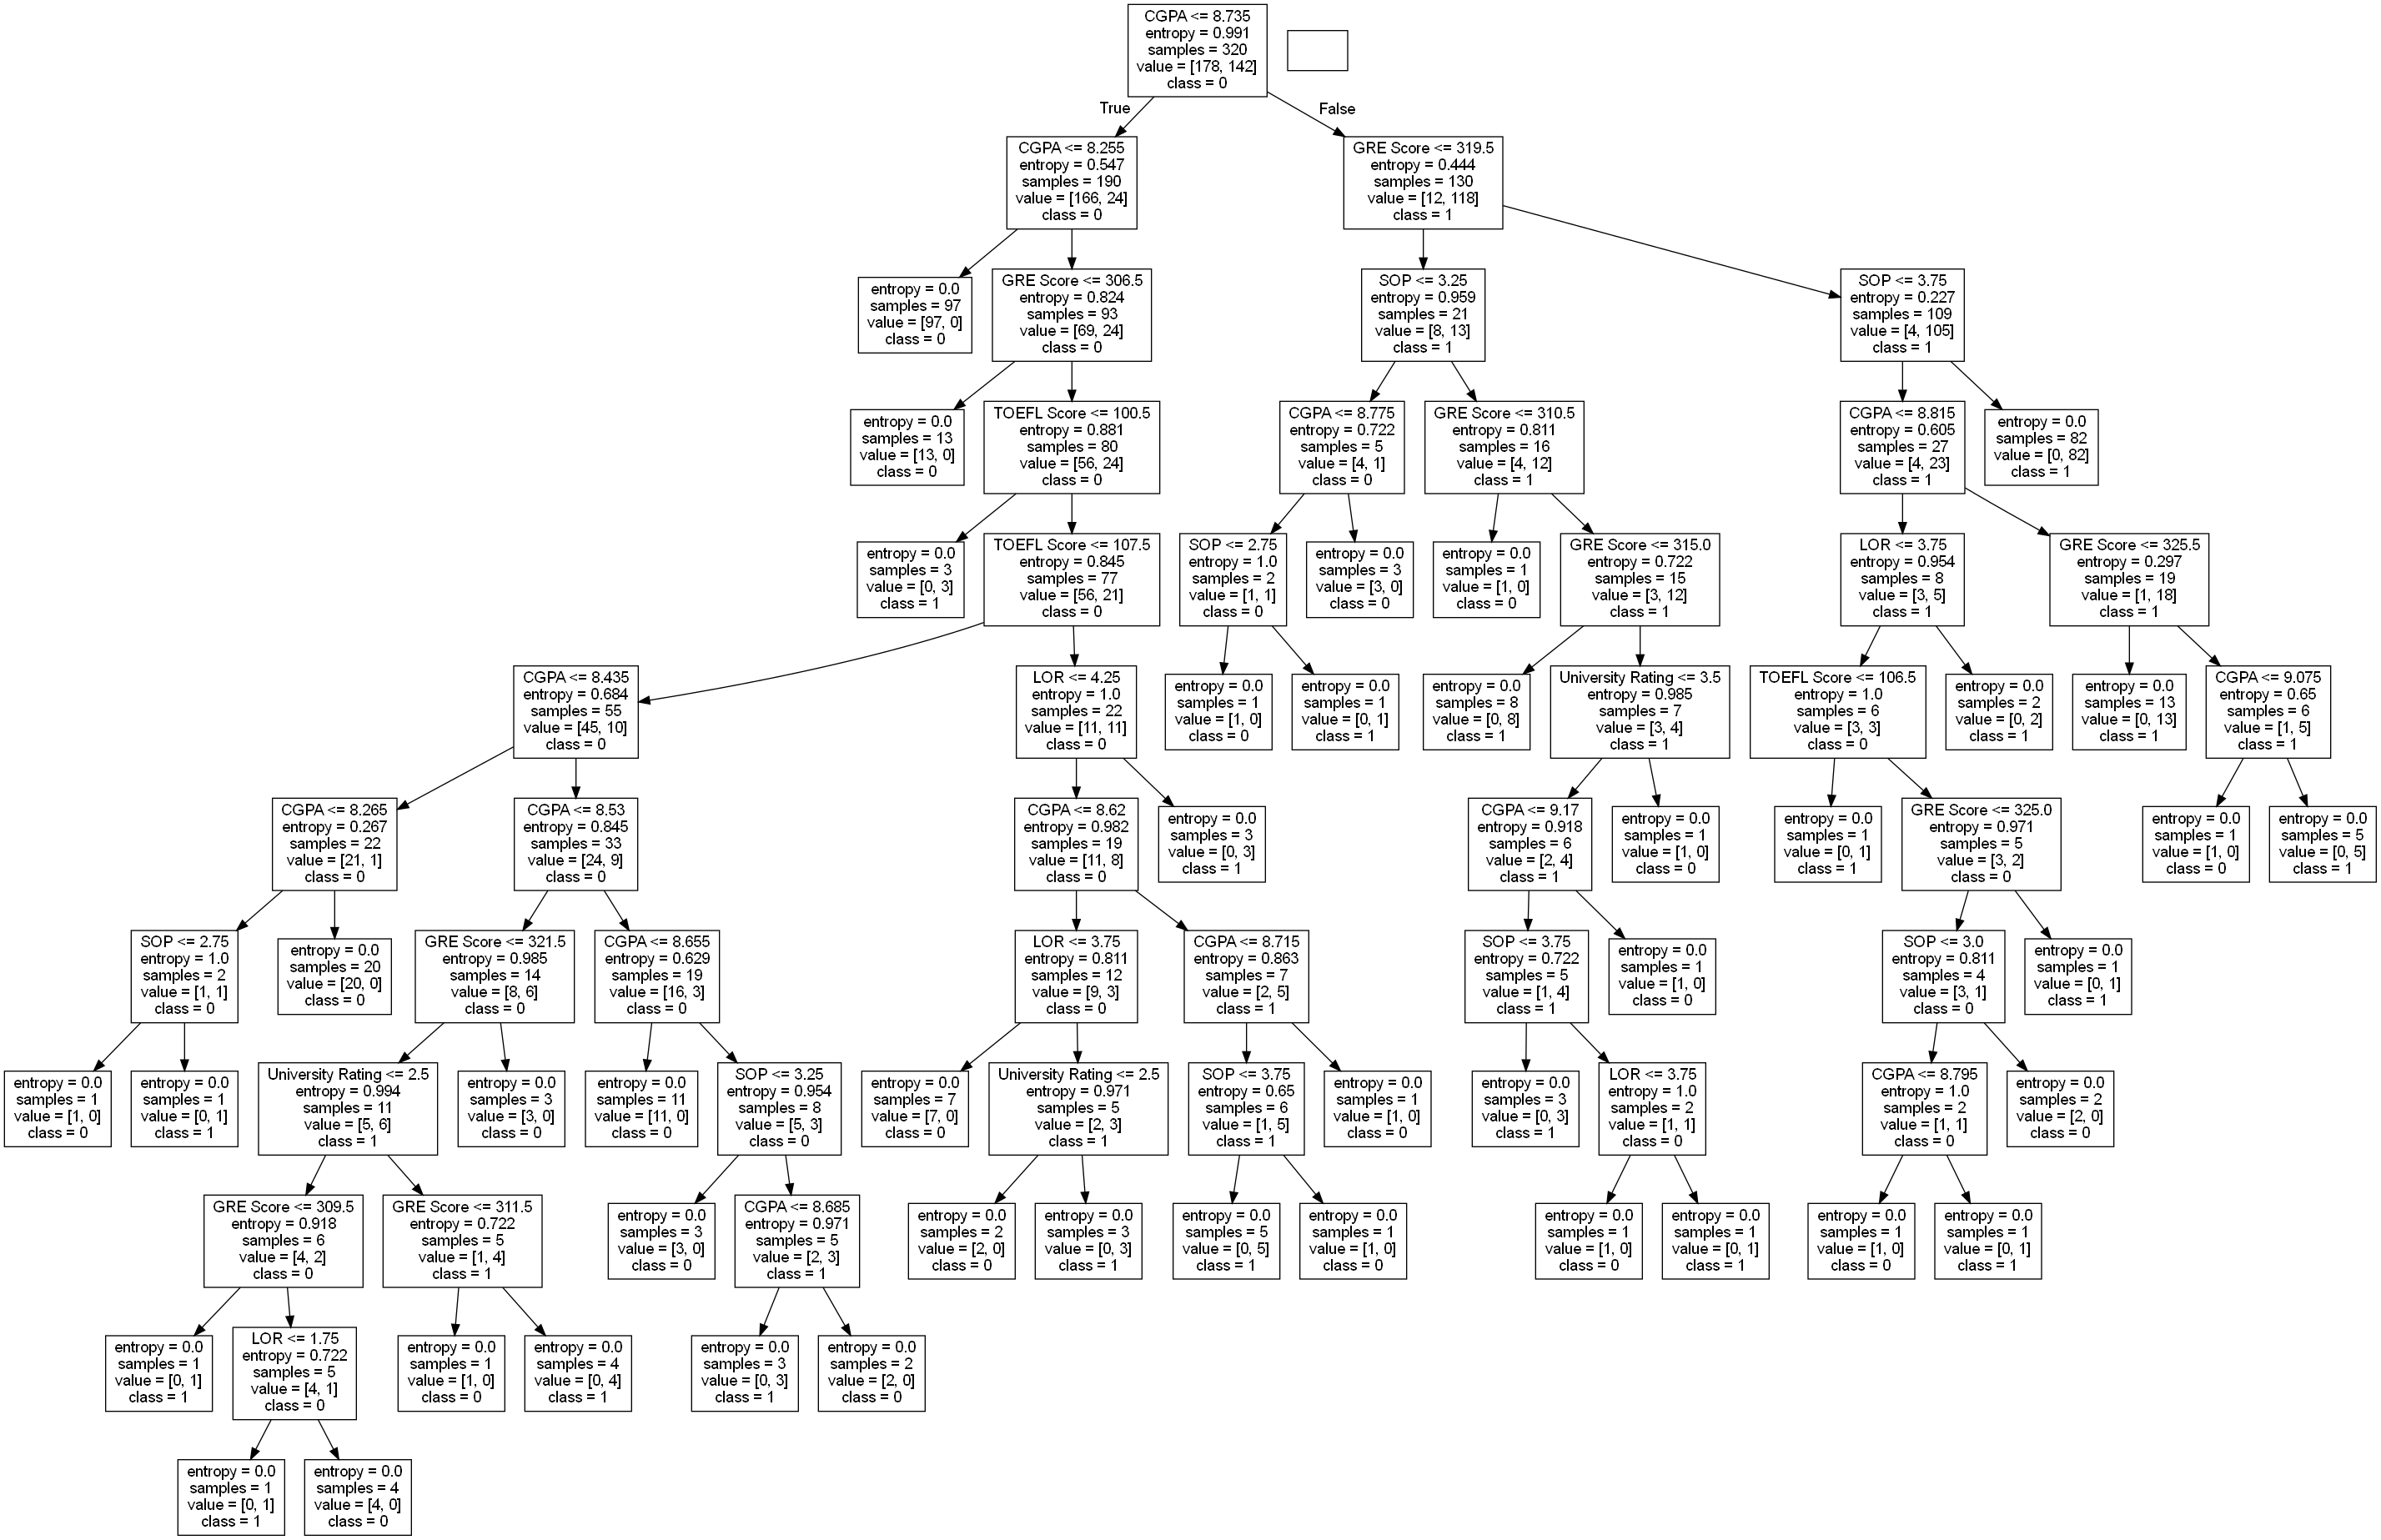

In [20]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn import tree
labels=x_train.columns
dot_data=tree.export_graphviz(decisiontree,feature_names=labels,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Over fit

In [21]:
from sklearn.metrics import classification_report
y_train_pred=decisiontree.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [25]:
y_test_pred=decisiontree.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In the above output there is differnce between train and test accurecy, we can conclude that decision tree is overfitted on train data 




To overcome from this problem 
We will tune some hyper parameter using Gridsearch

# Tuning hyperparameter

In [24]:
dt_model = DecisionTreeClassifier(criterion ='entropy',
                                  max_depth =3,
                                  max_features ='sqrt',
                                  max_leaf_nodes =8,
                                  min_samples_leaf =3,
                                  min_samples_split =2,
                                  random_state = 10)
dt_model = dt_model.fit(x_train,y_train)

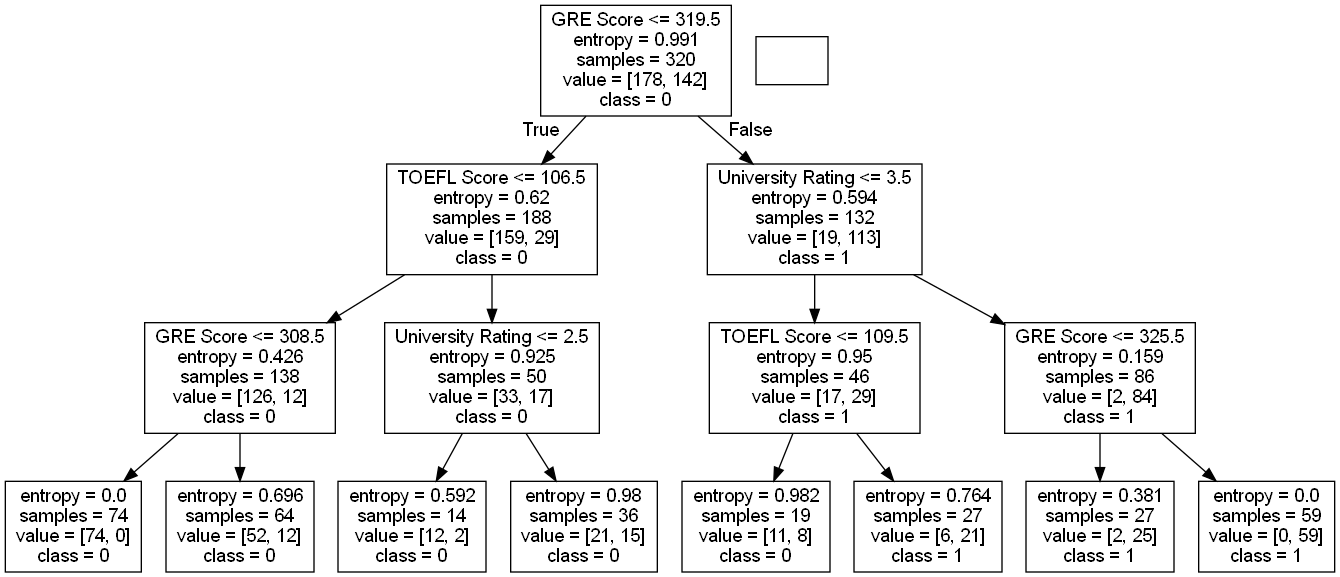

In [26]:
labels = x_train.columns
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [27]:
y_train_pred=dt_model.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       178
           1       0.93      0.74      0.82       142

    accuracy                           0.86       320
   macro avg       0.88      0.85      0.85       320
weighted avg       0.87      0.86      0.86       320



In [28]:
y_test_pred=dt_model.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



Now we can see that there is no difference between train and test data accurecy, thus we can conclude that we can avoide overfitting problem by tuning some hyper parameter

# Project Description:

We developed a decision tree classifier to predict the likelihood of university admission based on various academic and extracurricular features. The model was trained using historical data of student profiles and their admission outcomes. By analyzing these features, the model can accurately predict whether a student is likely to be admitted, providing valuable insights for the admissions process. The decision tree visualization helps in understanding the key factors influencing admission decisions, making the model interpretable and useful for stakeholders.